# AEFIT

This would be the first attempt to run the unsupervised learning VAE network to learn how to characterize a 1D profile with atted noise and missing input.

More than a simple fit, this method should learn 

In [2]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt

%aimport Dummy_g1data

import Dummy_g1data as dummy

%aimport models.base
%aimport models.AEFIT
# %aimport models.AEFIT3
%aimport models.AEFIT5

# ipysh.Bootstrap_support.debug()

## Data and Model
The model and data generator are set:
Dummy data generator generates from a set of 5 kind of curves with a dataset cardinality of 60K samples.

All the shapes are generated from a dictionary array that defines mean sigma and gain of sum of gaussians.
This table is printed from the variable ds.kinds

>NOTE: 
> The actual model is generating random so it is not redoing the very same samples on each epoch.
> To exactly constraint the maximum size of the dataset the tf buffer can be used

the model uses bby default an input of 40 samples that are the (x,y) tuple values of 20 points from the generated shapes.


In [3]:
ds = dummy.Dummy_g1data(counts=10000).buffer()
dt = dummy.Dummy_g1data(counts=2000).buffer()
ds.kinds

[{'gain': [1, 1], 'mean': [0.2, 0.8], 'sigma': [0.1, 0.1]},
 {'gain': [0.5], 'mean': [0.8], 'sigma': [0.1]},
 {'gain': [0.5], 'mean': [0.2], 'sigma': [0.1]},
 {'gain': [1], 'mean': [0.5], 'sigma': [0.2]},
 {'gain': [0.5], 'mean': [0.5], 'sigma': [0.2]}]

In [ ]:
# m = aefit.AEFIT(latent_dim=2)
# aefit.test_dummy(m, data=ds, epoch=5, batch=200, loss_factor=1e-3)

In [26]:
dds = ds.ds_array.map(lambda xy,l: (xy,xy) )
ddt = dt.ds_array.map(lambda xy,l: (xy,xy) )
[x for x in dds.take(1)][0]

(<tf.Tensor: id=67492, shape=(40,), dtype=float32, numpy=
 array([0.03923424, 0.05170552, 0.05849455, 0.15199141, 0.24524358,
        0.30541655, 0.42885992, 0.45686305, 0.4835414 , 0.5188546 ,
        0.5878974 , 0.6035805 , 0.65249026, 0.6832501 , 0.69190747,
        0.723548  , 0.8951394 , 0.8959912 , 0.92440474, 0.9442237 ,
        0.03519114, 0.04054891, 0.04372936, 0.11002783, 0.22214885,
        0.3114766 , 0.46934906, 0.48850423, 0.49830982, 0.49778306,
        0.45397115, 0.43724632, 0.37388268, 0.32860306, 0.3155295 ,
        0.26771873, 0.07101695, 0.07042127, 0.05262103, 0.04243292],
       dtype=float32)>,
 <tf.Tensor: id=67493, shape=(40,), dtype=float32, numpy=
 array([0.03923424, 0.05170552, 0.05849455, 0.15199141, 0.24524358,
        0.30541655, 0.42885992, 0.45686305, 0.4835414 , 0.5188546 ,
        0.5878974 , 0.6035805 , 0.65249026, 0.6832501 , 0.69190747,
        0.723548  , 0.8951394 , 0.8959912 , 0.92440474, 0.9442237 ,
        0.03519114, 0.04054891, 0.04372936,

In [140]:
m3 = models.AEFIT5.AEFIT5(latent_dim=2, scale=2., beta=0.001, geometry=[20,20,10,10])
# m3.compile( tf.optimizers.Adam(1e-3), tf.keras.losses.mse )

AEFIT5 a ready:


In [141]:
# models.base.train_thread(m3, ds, epoch=20, batch=100, learning_rate=1e-3).control_panel()
m3.learning_rate = 1e-4
h = m3.fit(dds.batch(100), validation_data=ddt.batch(100), epochs=50, callbacks=[])


Epoch 1/50
100/100 [==============================] - 10s 100ms/step - loss: 0.0851 - val_loss: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 8s 82ms/step - loss: 0.0298 - val_loss: 0.0212
Epoch 3/50
100/100 [==============================] - 8s 82ms/step - loss: 0.0181 - val_loss: 0.0162
Epoch 4/50
100/100 [==============================] - 8s 82ms/step - loss: 0.0151 - val_loss: 0.0139
Epoch 5/50
100/100 [==============================] - 8s 84ms/step - loss: 0.0134 - val_loss: 0.0132
Epoch 6/50
100/100 [==============================] - 8s 84ms/step - loss: 0.0129 - val_loss: 0.0126
Epoch 7/50
100/100 [==============================] - 8s 84ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 8/50
100/100 [==============================] - 8s 83ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 9/50
100/100 [==============================] - 8s 84ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 10/50
100/100 [==============================] - 8s 82ms/step - loss: 0.0118 - 

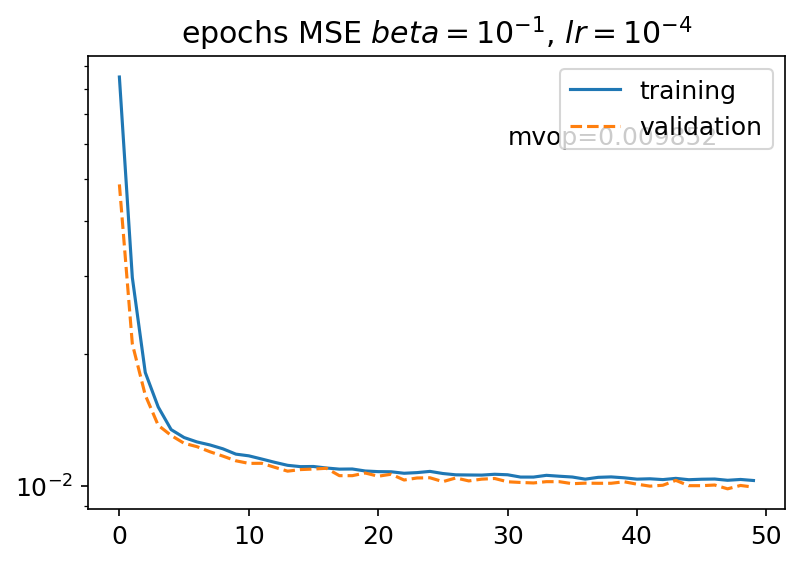

In [142]:
loss = [ x[0] for x in h.history['loss'] ]
val_loss = [ x[0] for x in h.history['val_loss'] ]
fig = plt.figure('loss')
plt.rcParams.update({'font.size': 12})
ax = plt.gca()
ax.set_title('epochs MSE $beta=10^{-1}$, $lr=10^{-4}$')
ax.set_yscale('log')
fig.set_dpi(150)
plt.plot(loss, '-',label='training')
plt.plot(val_loss, '--',label='validation')
plt.text(30., 0.06, 'mvop=%f'%min(val_loss))
plt.legend()

In [144]:
m3.apply_sigmoid = False
p = Hplt.LSPlotBokeh()
p.set_model(m3)
p.set_data(ds, counts=1000, show_kinds=True)
p.plot(notebook_url='http://172.17.0.2:8888')
# p._figure_ls.output_backend = "svg"

Loading BokehJS ...

[<tf.Variable 'aefi_t5_6_gRlv/kernel:0' shape=(2,) dtype=float32, numpy=array([0.9970823, 0.9999999], dtype=float32)>]

In [37]:
relevance = m3.generative_net.layers[0]
relevance.weights

[<tf.Variable 'aefi_t5_7_gRlv/kernel:0' shape=(2,) dtype=float32, numpy=array([0.9999999, 0.984353 ], dtype=float32)>]

In [83]:
m3.save('step1_be-3')

## Missing data simulation

Now we want to test the network against particular shapes within the latent main paths but with added noise and simulated missing data. The function simulate_missing_data reduce de number of available input simply duplicating the point that precedes the missing one with the same value.

A further gaussian noise has been also applied.

In [78]:

def simulate_missing_data(m, lpt=[0.5,-1.6], noise_var=0.05, arr = [3,2,1,5,8,7,6,9,12,11,14,13,18], title=None, data=None, counts=1000):
    xy = m.decode(tf.convert_to_tensor([pt]), training=False)
    x,y = tf.split(xy[0], 2)
    x,y = (x.numpy(), y.numpy())

    fig = plt.figure('gen_missing_curve',figsize=(18, 6))    
    ax2 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)    
    fig.set_dpi(150)
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'lines.markeredgewidth': 2})
    
#     ax1.set_xlim(-2.,2.)
#     ax1.set_ylim(-2.,2.)
    
    if data is not None:
        for xy in data.take(counts).batch(1):
            me,va = m.encode(xy, training=False)
            me = me[0].numpy()
            ax1.scatter(me[0], me[1], s=20, c='lightgrey')
    
    ax1.set_title('latent representation error')
    ax1.scatter(pt[0],pt[1],s=80)    
    ax2.plot(x,y,'.:',linewidth=2, markersize=12, markeredgewidth=2)
    ax2.set_title(title)

    # apply noise
    x += np.random.normal(0,noise_var,len(x))
    y += np.random.normal(0,noise_var,len(y))

    # apply missing data simulation
    for i,v in enumerate(arr,0):
        x[arr[i]]=x[arr[i]+1]
        y[arr[i]]=y[arr[i]+1]
    
    ax2.plot(x,y,'x',linewidth=2, markersize=12)

    me,va = m.encode(tf.reshape(tf.concat([x,y],0), shape=[1,-1]), training=False)
    print("Guessed Latent point = ",me.numpy())
    gpt = me[0].numpy()
    ax1.scatter(gpt[0],gpt[1])
    
    XY = m.decode(me, training=False)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())
    # plt.figure('reconstructed')
    ax2.plot(X,Y,'-+',linewidth=2, markersize=12)
    # ax2.plot(X,Y,'-.')



We start by generating close to the shape {'mean': [0.5], 'sigma': [0.2], 'gain': [0.5]}

This is in the middle of the central cluster

Guessed Latent point =  [[1.4361979 1.55461  ]]


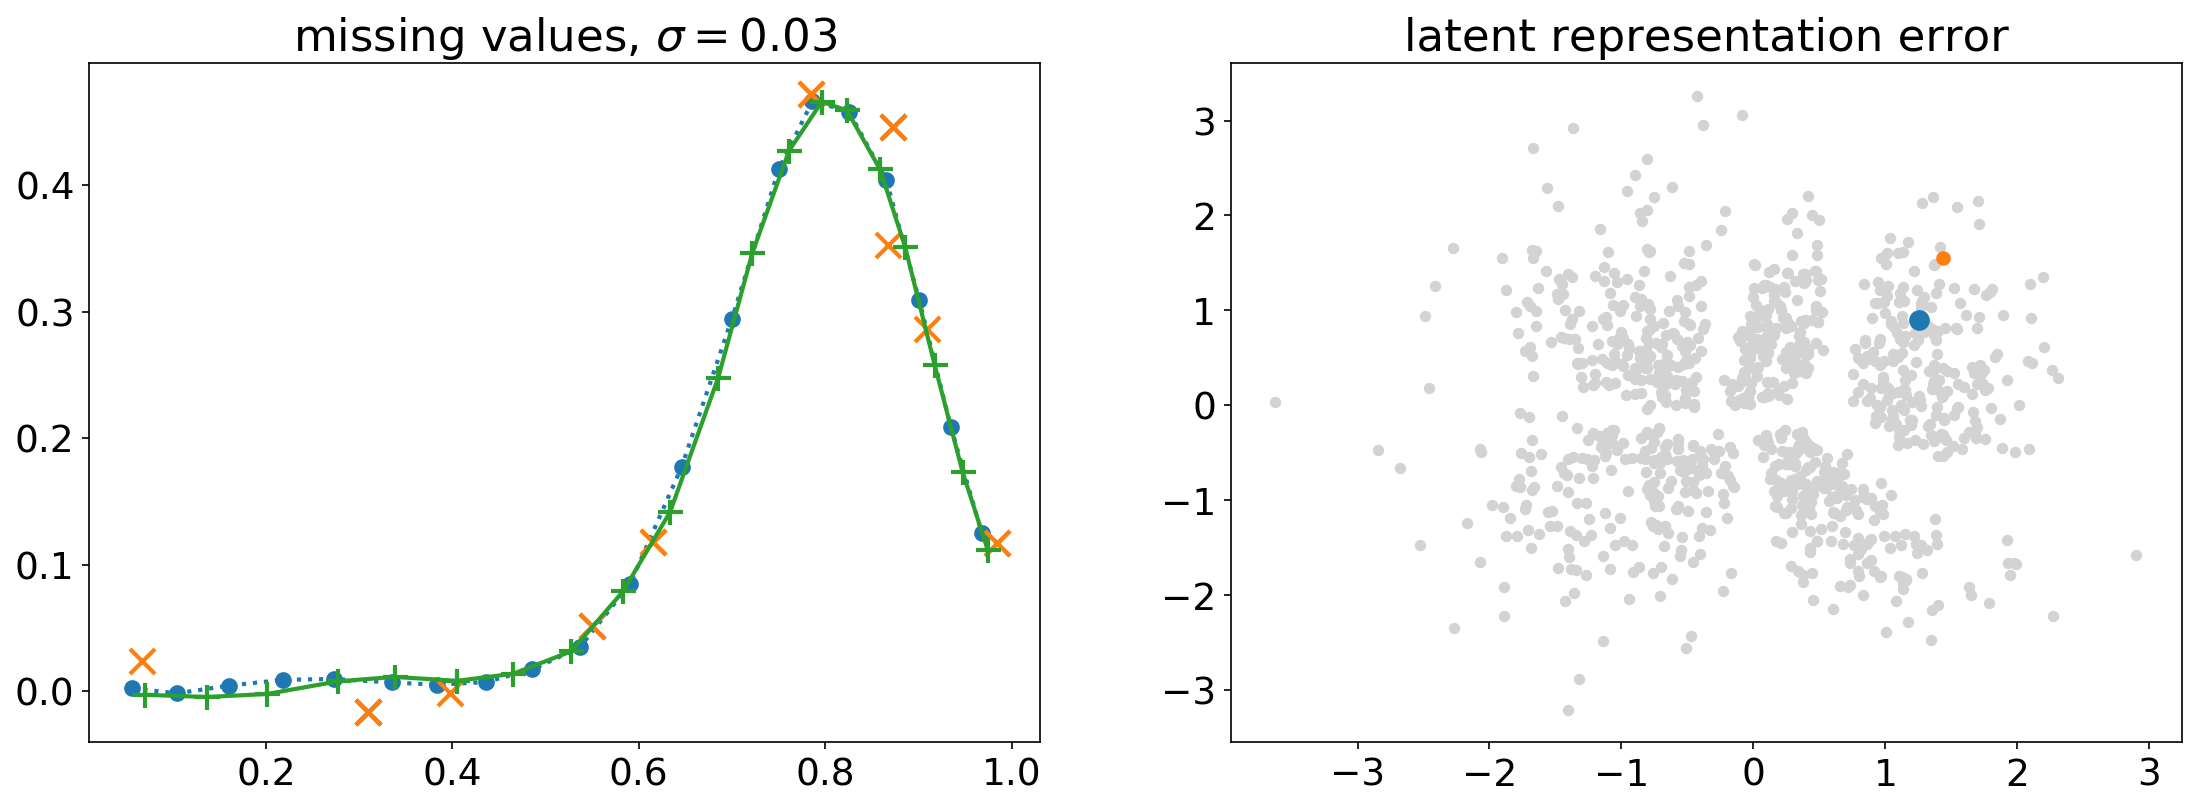

In [79]:

    
# generate from point: 0.6, -0.7
pt = [1.252,0.896]
noise_var = 0.03
arr = [3,2,1,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m3, pt,noise_var, arr, title='missing values, $\sigma=0.03$', data=ds.ds_array, counts=1000)


Now we want to check if the nework can simulate a point in the middle od two clusters

Guessed Latent point =  [[0.99251133 1.6114513 ]]


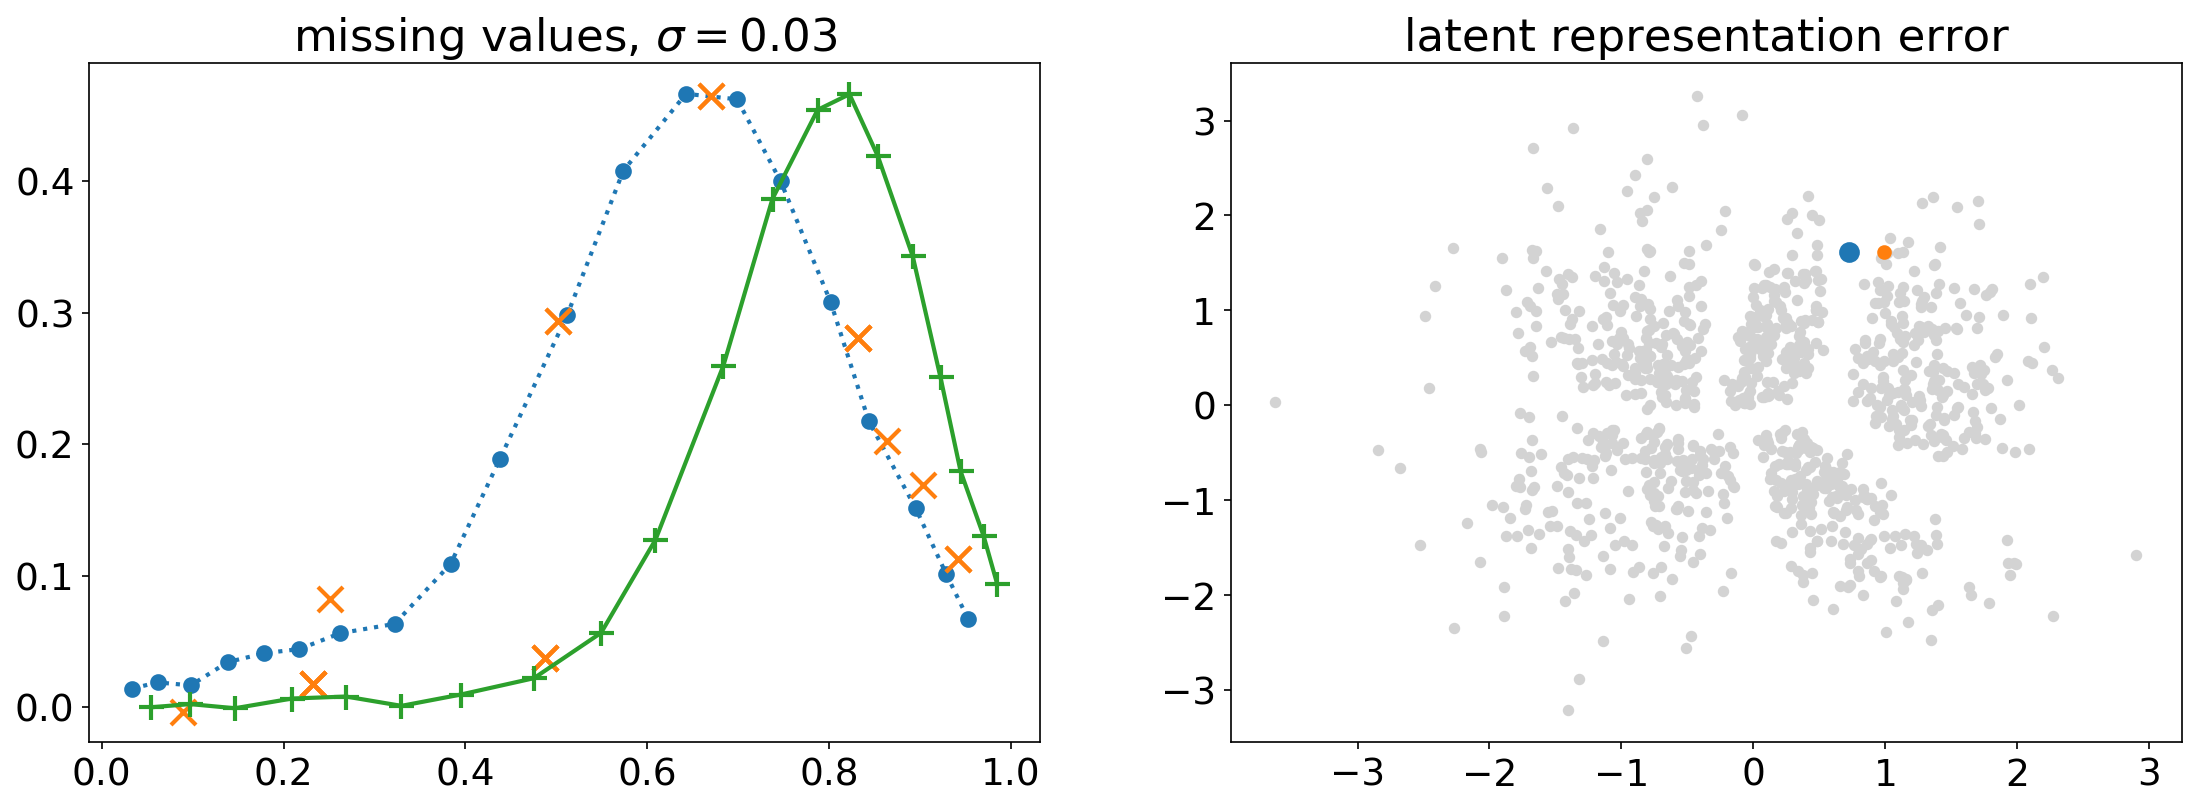

In [81]:
# generate from point: 0.5, -1.6
pt = [0.725,1.613]
noise_var = 0.05
arr = [3,2,1,5,8,7,6,9,12,11,14,13,18]
simulate_missing_data(m3, pt,noise_var,arr, title='missing values, $\sigma=0.03$', data=ds.ds_array, counts=1000)

